In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'dcard_predictions.csv'  # Change to your actual file path
file_path = 'dcard_predictions_4_class_all.csv'  # Change to your actual file path
df = pd.read_csv(file_path)
print(df.shape)
# filter out the rows that is empty in 'content' column
df = df.dropna(subset=['content'])
print(df.shape) 

(214713, 18)
(214710, 18)


/tmp/ipykernel_154374/2900403702.py:7: DtypeWarning: Columns (0,8,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [55]:
# df['createdAt'] = pd.to_datetime(df['createdAt'])
created_at = df['createdAt']
print(len(created_at))
# 144984
for i in range(len(created_at)):
    try:
        # check if it is a valid date, created_at.iloc[i] is in the format of '2024-07-09 10:13:48.131000+00:00'
        if len(created_at.iloc[i]) != 32:
            pass
    except:
        print("Error", i)
        print((created_at.iloc[i-1]))
        print((created_at.iloc[i]))
        print((created_at.iloc[i+1]))
        # replace created_at.iloc[i] and created_at.iloc[i+1] into created_at.iloc[i-1]
        created_at.iloc[i] = created_at.iloc[i-1]
        created_at.iloc[i+1] = created_at.iloc[i-1]
# print(created_at[144900:145000])
df['createdAt'] = (created_at)


214710
Error 144983
2022-10-19 15:44:16.769000+00:00
nan
gu


/tmp/ipykernel_154374/3839463645.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  created_at.iloc[i] = created_at.iloc[i-1]
/tmp/ipykernel_154374/3839463645.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  created_at.iloc[i+1] = created_at.iloc[i-1]
/tmp/ipykernel_154374/3839463645.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['createdAt'] = (created_at)


crisis_level   0.0   1.0   2.0  3.0
year_month                         
2021-11       2952  1533   640   80
2021-12       2824  1435   580   73
2022-01       2672  1499   670  101
2022-02       2609  1495   581   80
2022-03       2894  1602   673   86
2022-04       3231  1657   659   82
2022-05       4159  1866   707   86
2022-06       3485  1871   819   73
2022-07       3359  1865   767  106
2022-08       3487  1942   804  104
2022-09       3461  1913   809   91
2022-10       3496  1905   812   95
2022-11       3397  1909   779   93
2022-12       3352  1651   694   56
2023-01       3532  1805   716   81
2023-02       3226  1679   725   84
2023-03       3976  1929   912   90
2023-04       4069  2106   954  112
2023-05       4462  2100   949   89
2023-06       4334  2239   943  112
2023-07       4258  2343   922  123
2023-08       4600  2350  1062  107
2023-09       4053  2156   889   88
2023-10       4189  2243  1007  112
2023-11       4173  2064   939   80
2023-12       4128  2039   8

/tmp/ipykernel_154374/1317137053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['createdAt'] = pd.to_datetime(df['createdAt'])
/tmp/ipykernel_154374/1317137053.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['createdAt_local'] = df['createdAt'].dt.tz_convert('Asia/Taipei')
/tmp/ipykernel_154374/1317137053.py:25: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['createdAt_local'].dt.to_period('M')  # Rounded down to the month

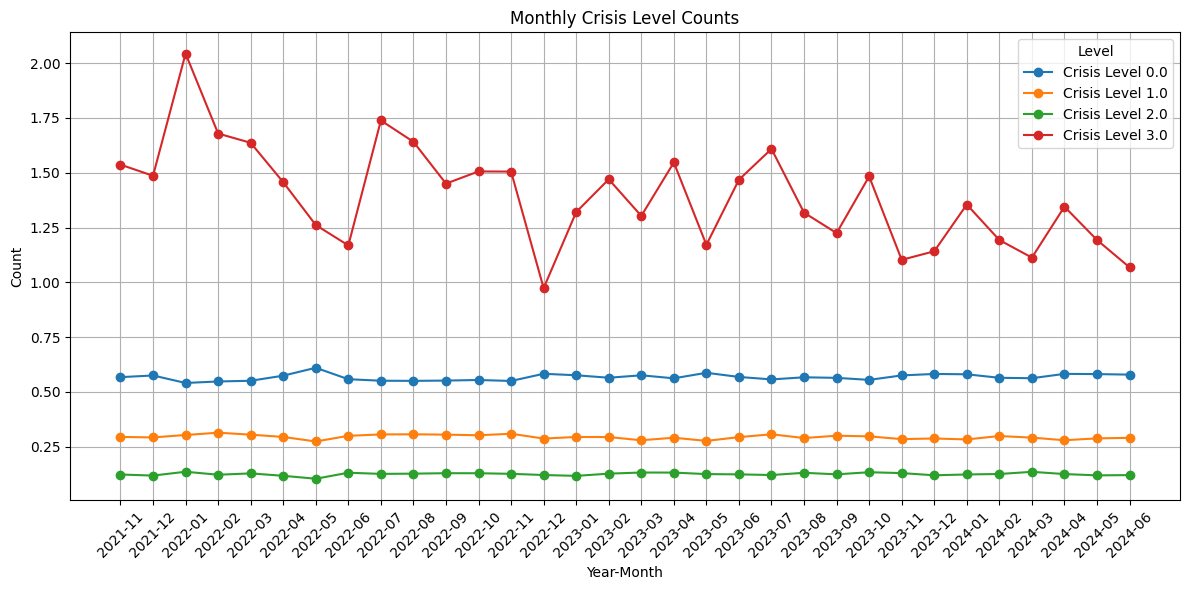

0.0    121861
1.0     63078
2.0     26827
3.0      2942
Name: crisis_level, dtype: int64


In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
# file_path = 'dcard_predictions.csv'  # Change to your actual file path
# file_path = 'dcard_predictions_4_class_all.csv'  # Change to your actual file path
# df = pd.read_csv(file_path)
# print(df.shape)
# # filter out the rows that is empty in 'content' column
# df = df.dropna(subset=['content'])
# 將無效的日期字符串替換為 NaT (Not a Time)
# df['date_column'] = pd.to_datetime(df['date_column'], errors='coerce')

# 或者將無效的日期字符串替換為特定日期
# df['date_column'] = pd.to_datetime(df['date_column'], errors='coerce').fillna(pd.Timestamp('1970-01-01'))

# Convert 'createdAt' to datetime
df['createdAt'] = pd.to_datetime(df['createdAt'])
# df['createdAt'] = pd.to_datetime(df['createdAt'])

# Convert existing timezone to Taipei time (UTC+8)
df['createdAt_local'] = df['createdAt'].dt.tz_convert('Asia/Taipei')

# Extract year, month, day, and hour as periods
df['year_month'] = df['createdAt_local'].dt.to_period('M')  # Rounded down to the month
df['year_month_day'] = df['createdAt_local'].dt.to_period('D')  # Rounded down to the day
df['year_month_day_hour'] = df['createdAt_local'].dt.to_period('H')  # Rounded down to the hour

# Group by year_month and crisis_level, then count occurrences
monthly_crisis_stats = df.groupby(['year_month', 'crisis_level']).size().unstack(fill_value=0)[1:-1]
print(monthly_crisis_stats)
monthly_crisis_proportions = monthly_crisis_stats.div(monthly_crisis_stats.sum(axis=1), axis=0)

# Plot Propotions
plt.figure(figsize=(12, 6))
for level in monthly_crisis_proportions.columns:
    if level == 3:
        plt.plot(monthly_crisis_proportions.index.astype(str), monthly_crisis_proportions[level]*100, label=f'Crisis Level {level}',  marker='o')
    else:
        plt.plot(monthly_crisis_proportions.index.astype(str), monthly_crisis_proportions[level], label=f'Crisis Level {level}',  marker='o')


# Plotting
# plt.figure(figsize=(12, 6))
# for level in monthly_crisis_stats.columns:
#     if level == 3:
#         plt.plot(monthly_crisis_stats.index.astype(str), monthly_crisis_stats[level], label=f'Crisis Level {level}',  marker='o')
#     else:
#         plt.plot(monthly_crisis_stats.index.astype(str), monthly_crisis_stats[level], label=f'Crisis Level {level}',  marker='o')

plt.title('Monthly Crisis Level Counts')
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate dates for better visibility
plt.legend(title='Level', loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print overall crisis level counts
print(df['crisis_level'].value_counts())


/tmp/ipykernel_159350/769963932.py:15: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['createdAt_local'].dt.to_period('M')  # Rounded down to the month


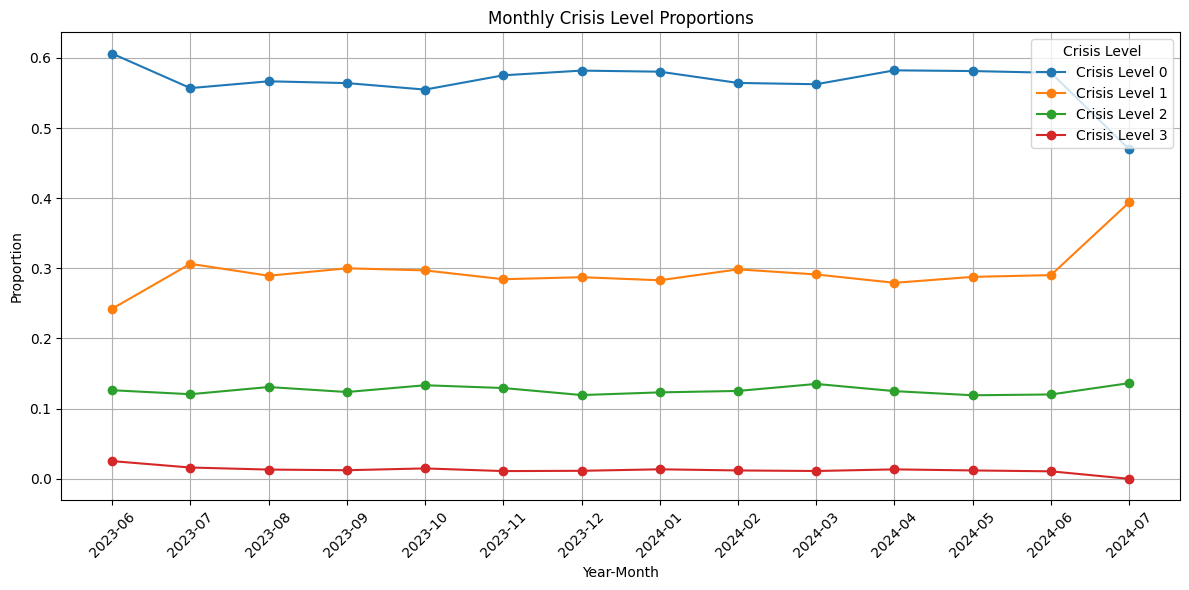

crisis_level         0         1         2         3
year_month                                          
2023-06       0.606061  0.242424  0.126263  0.025253
2023-07       0.556892  0.306435  0.120586  0.016087
2023-08       0.566572  0.289445  0.130804  0.013179
2023-09       0.564013  0.300028  0.123713  0.012246
2023-10       0.554761  0.297047  0.133360  0.014832
2023-11       0.575110  0.284454  0.129410  0.011025
2023-12       0.581818  0.287385  0.119380  0.011416
2024-01       0.580283  0.282978  0.123190  0.013549
2024-02       0.564240  0.298562  0.125268  0.011930
2024-03       0.562394  0.291268  0.135211  0.011127
2024-04       0.582201  0.279348  0.125000  0.013451
2024-05       0.581170  0.287831  0.119066  0.011933
2024-06       0.578769  0.290331  0.120216  0.010683
2024-07       0.469697  0.393939  0.136364  0.000000


In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'dcard_predictions.csv'  # Change to your actual file path
df = pd.read_csv(file_path)

# Convert 'createdAt' to datetime
df['createdAt'] = pd.to_datetime(df['createdAt'])

# Convert existing timezone to Taipei time (UTC+8)
df['createdAt_local'] = df['createdAt'].dt.tz_convert('Asia/Taipei')

# Extract year, month, day, and hour as periods
df['year_month'] = df['createdAt_local'].dt.to_period('M')  # Rounded down to the month

# Group by year_month and crisis_level, then count occurrences
monthly_crisis_counts = df.groupby(['year_month', 'crisis_level']).size().unstack(fill_value=0)

# Calculate the proportions of each crisis level per month
monthly_crisis_proportions = monthly_crisis_counts.div(monthly_crisis_counts.sum(axis=1), axis=0)

# Plotting
plt.figure(figsize=(12, 6))
for level in monthly_crisis_proportions.columns:
    if level in [0, 1, 2]:
        plt.plot(monthly_crisis_proportions.index.astype(str), monthly_crisis_proportions[level], label=f'Crisis Level {level}',  marker='o')
    else:
        # scale 10 times for better visibility'
        plt.plot(monthly_crisis_proportions.index.astype(str), monthly_crisis_proportions[level]*1, label=f'Crisis Level {level}',  marker='o')
plt.title('Monthly Crisis Level Proportions')
plt.xlabel('Year-Month')
plt.ylabel('Proportion')
plt.xticks(rotation=45)  # Rotate dates for better visibility
plt.legend(title='Crisis Level')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print monthly crisis level proportions
print(monthly_crisis_proportions)

crisis_level     0     1    2   3
hour                             
0             3037  1919  812  74
1             2329  1469  712  86
2             1674  1040  573  56
3             1116   733  403  37
4              802   529  249  20
5              609   376  198  23
6              636   339  149  19
7              865   362  171  18
8             1212   466  192  16
9             1499   749  293  25
10            1912   919  335  24
11            2046   970  399  42
12            2273  1004  384  28
13            2299  1059  449  37
14            2312  1071  430  49
15            2323  1115  459  49
16            2419  1136  454  61
17            2489  1133  429  43
18            2561  1109  521  47
19            2683  1205  518  53
20            3004  1416  568  61
21            3043  1587  664  79
22            3340  1794  777  77
23            3474  2004  848  85


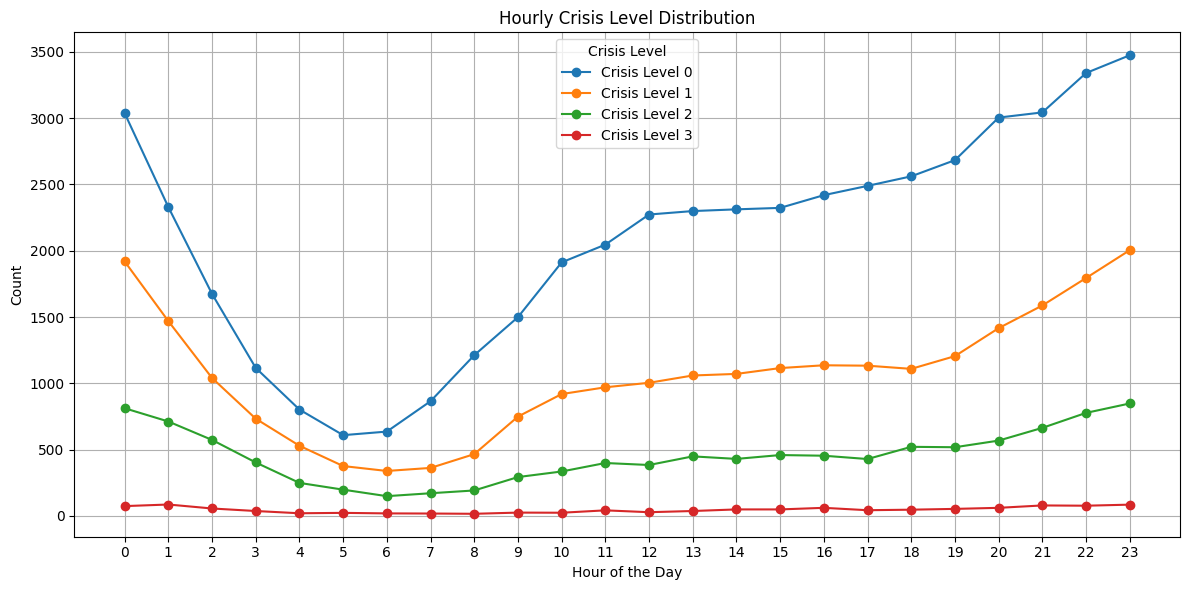

0    49957
1    25504
2    10987
3     1109
Name: crisis_level, dtype: int64


In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'dcard_predictions.csv'  # Change to your actual file path
df = pd.read_csv(file_path)

# Convert 'createdAt' to datetime and adjust for local timezone
df['createdAt'] = pd.to_datetime(df['createdAt'])
df['createdAt_local'] = df['createdAt'].dt.tz_convert('Asia/Taipei')  # Assuming timezone info is already present

# Extract only the hour part
df['hour'] = df['createdAt_local'].dt.hour

# Group by hour and crisis_level, then count occurrences
hourly_crisis_stats = df.groupby(['hour', 'crisis_level']).size().unstack(fill_value=0)
print(hourly_crisis_stats)

# Plotting
plt.figure(figsize=(12, 6))
for level in hourly_crisis_stats.columns:
    if level in [0, 1, 2]:
        plt.plot(hourly_crisis_stats.index, hourly_crisis_stats[level], marker='o', label=f'Crisis Level {level}')
    else:
        plt.plot(hourly_crisis_stats.index, hourly_crisis_stats[level]*1, marker='o', label=f'Crisis Level {level}')

plt.title('Hourly Crisis Level Distribution')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.xticks(range(0, 24))  # Ensure all hours are shown from 0 to 23
plt.legend(title='Crisis Level')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print overall crisis level counts
print(df['crisis_level'].value_counts())


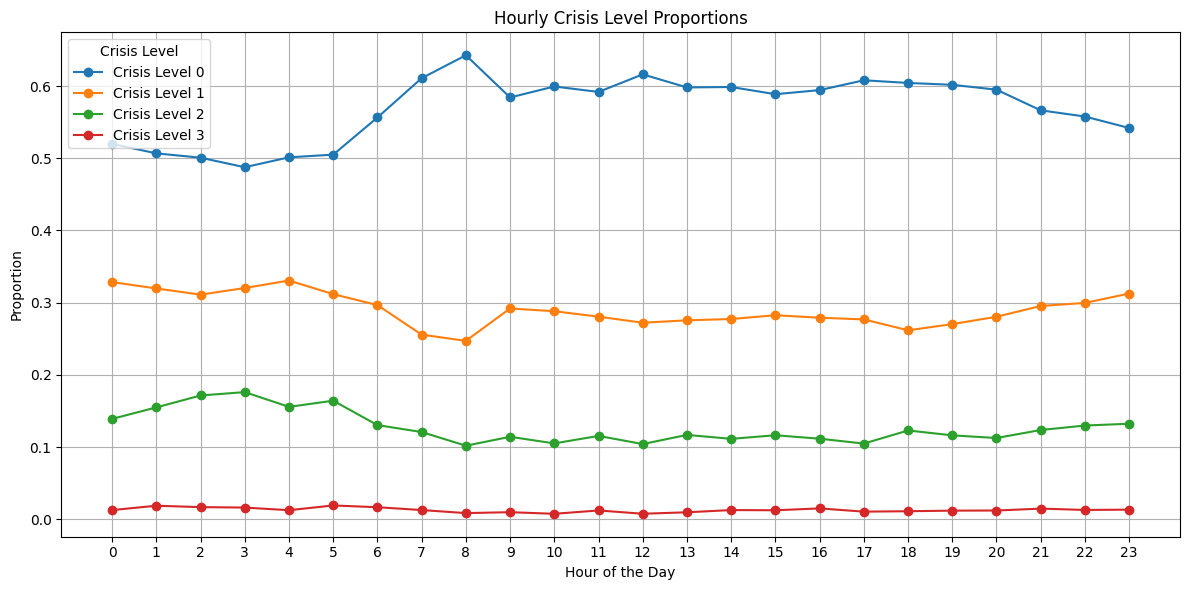

Overall crisis level proportions:
crisis_level
0    0.570565
1    0.291285
2    0.125484
3    0.012666
dtype: float64
crisis_level         0         1         2         3
hour                                                
0             0.519856  0.328483  0.138993  0.012667
1             0.506745  0.319626  0.154917  0.018712
2             0.500748  0.311098  0.171403  0.016751
3             0.487549  0.320227  0.176059  0.016164
4             0.501250  0.330625  0.155625  0.012500
5             0.504975  0.311774  0.164179  0.019071
6             0.556430  0.296588  0.130359  0.016623
7             0.610876  0.255650  0.120763  0.012712
8             0.642630  0.247084  0.101803  0.008484
9             0.584178  0.291894  0.114186  0.009743
10            0.599373  0.288088  0.105016  0.007524
11            0.591843  0.280590  0.115418  0.012149
12            0.616156  0.272160  0.104093  0.007590
13            0.598075  0.275494  0.116805  0.009625
14            0.598654  0.277317  

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'dcard_predictions.csv'  # Change to your actual file path
df = pd.read_csv(file_path)

# Convert 'createdAt' to datetime and adjust for local timezone
df['createdAt'] = pd.to_datetime(df['createdAt'])
df['createdAt_local'] = df['createdAt'].dt.tz_convert('Asia/Taipei')  # Assuming timezone info is already present

# Extract only the hour part
df['hour'] = df['createdAt_local'].dt.hour

# Group by hour and crisis_level, then count occurrences
hourly_crisis_counts = df.groupby(['hour', 'crisis_level']).size().unstack(fill_value=0)

# Calculate the proportions of each crisis level per hour
hourly_crisis_proportions = hourly_crisis_counts.div(hourly_crisis_counts.sum(axis=1), axis=0)

# Plotting
plt.figure(figsize=(12, 6))
for level in hourly_crisis_proportions.columns:
    if level in [0, 1, 2]:
        plt.plot(hourly_crisis_proportions.index, hourly_crisis_proportions[level], marker='o', label=f'Crisis Level {level}')
    else:
        plt.plot(hourly_crisis_proportions.index, hourly_crisis_proportions[level]*1, marker='o', label=f'Crisis Level {level}')

plt.title('Hourly Crisis Level Proportions')
plt.xlabel('Hour of the Day')
plt.ylabel('Proportion')
plt.xticks(range(0, 24))  # Ensure all hours are shown from 0 to 23
plt.legend(title='Crisis Level')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print overall crisis level proportions
overall_proportions = hourly_crisis_counts.sum().div(hourly_crisis_counts.sum().sum())
print("Overall crisis level proportions:")
print(overall_proportions)
print(hourly_crisis_proportions)